# Statistics Meets Logistics
--- 

## Description
This notebook holds the DataFrames and analysis for the project.

Requirements for the project environment can be found in https://github.com/luiul/statistics-meets-logistics/blob/main/requirements.txt. **Disclaimer**: the project has not been tested in other environments. 

## Overview
Start here!

## Goal 
The goal of this project is to perform a regression analysis given raw download and upload data to estimate the throughput 

## In General
In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features').

## Question

# Import Libraries and Set Options
---

## Import Libraries

In [8]:
# Vector (Series) & Matrix (DateFrame) manipulation 
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Python Utilities
# Generate datetime objects from raw timestamps
from datetime import datetime

# OS Interface
# import os

# Regex search patterns 
# import re

In [5]:
# Split Function (see Signature for correct tuple unpacking)
from sklearn.model_selection import train_test_split

# Linear Regression Model
from sklearn.linear_model import LinearRegression

In [10]:
# Polynomial Regression ( poly_trafo: X->X*...*X )
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Data Scaling (iff values are in different order of magnitude)
from sklearn.preprocessing import StandardScaler

In [ ]:
# Elastic Net Regularization: start here for regularization in Linear Regression. Make sure to keep an l1_ratio that allows us to go fully to Lasso or fully to Ridge. See Lasso and Ridge explanations below. 

from sklearn.linear_model import ElasticNetCV

In [ ]:
# L2: Ridge Regularization: adds beta squared shrinkage penalty. Hyper-parameter alpha: alpha=0 -> RSS minimization. L2 CV takes an alpha tuple and computes the hyper-parameter that delivers the best performance (either based on default scorer or one from the SCORES dictionary)

# Use from sklearn.linear_model import Ridge in case no CV is needed

from sklearn.linear_model import RidgeCV

In [ ]:
# L1: Lasso Regularization: adds absolute beta value shrinkage penalty. Hyper-parameter alpha: alpha=0 -> RSS minimization. There are two ways to determine the alpha hyper-parameter: (a) provide list of alphas as an array (b) alpha can be set automatically by the class based off epsilon and n_alphas (we use the default values)

# Use from sklearn.linear_model import Lasso in case no CV is needed

from sklearn.linear_model import LassoCV

In [8]:
# Performance Evaluation: common evaluation metrics; they can also be found in the SCORES dictionary (although transformed s.t. the higher the score the better, the model performance)
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Dictionary with different scorer objects; higher return values are better than lower return values by convention, e.g. negative error maximization -> the higher the score, the better the model performance
from sklearn.metrics import SCORERS

In [ ]:
# Normal Probability Plot
import scipy as sp

In [9]:
# ML Model Deployment 
from joblib import dump, load

## Check Prerequisites

In [6]:
# calling np.version.version should return 1.18.1
# np.version.version

# calling pd.__version__ should return 1.1.2
# pd.__version__

## Set Options

In [9]:
pd.set_option('display.max_columns',None)
# avoid truncate view of DataFrame (scroll to view all columns); set to 0 for pandas to auto-detect the with of the terminal and print truncated object that fits the screen width

# pd.set_option('float_format', '{:.2f}'.format)
# prints floats with two decimal points; do not comment out in this project since the features lat and lon have sigficant figures after two decimal points

In [4]:
# Display all outsputs if the cell has multiple commands as its input

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# Feature Engineering and Data Preparation
---

## Instantiate DataFrames and Explore Features

## Read in Data

In [3]:
dl = pd.read_csv('raw_data_dl.csv', delim_whitespace=True)
# dl is the DataFrame for the download raw data

ul = pd.read_csv('raw_data_ul.csv', delim_whitespace=True)
# ul is the DataFrame for the upload raw data

In [4]:
dl.head(3)

,timestamp,rawTimesamp,distance,lat,lon,alt,speed,acc,dir,connected,rsrp,rsrq,sinr,cqi,ss,ta,ci,pci,id,payload,throughput,rtt,measurement,location
0,10.33,1544432937,99.42,51.490553,7.413966,157.63,11.83,0.00,79.35,1,-85,-5,22,10,50,7,26385408,95,0,0.1,6.83763,41,1544432927,campus
1,21.87,1544432949,237.43,51.490715,7.416002,152.41,10.76,-0.52,89.45,1,-84,-6,11,13,52,4,29391105,167,1,2.0,9.71463,58,1544432927,campus
2,32.46,1544432959,325.26,51.490668,7.417176,154.64,6.19,-0.62,27.05,1,-82,-6,21,15,54,4,29391105,167,2,2.0,7.30594,57,1544432927,campus


In [5]:
ul.head(3)

,timestamp,rawTimesamp,distance,lat,lon,alt,speed,acc,dir,connected,rsrp,rsrq,sinr,cqi,ss,ta,ci,pci,id,payload,throughput,rtt,txPower,measurement,location
0,11.53,1544432938,113.75,51.490592,7.414306,156.39,12.21,0.5,77.59,1,-85,-5,22,10,50,7,26385408,95,0,4.0,24.5211,35,12.30470,1544432927,campus
1,21.33,1544432948,231.40,51.490717,7.415835,152.53,11.17,0.0,87.24,1,-84,-6,11,13,52,4,29391105,167,1,2.0,14.8561,51,10.01560,1544432927,campus
2,32.22,1544432959,323.73,51.490634,7.417138,154.23,6.44,0.0,48.55,1,-82,-6,21,15,54,4,29391105,167,2,4.0,16.2684,57,4.34375,1544432927,campus


<AxesSubplot:xlabel='lat', ylabel='lon'>

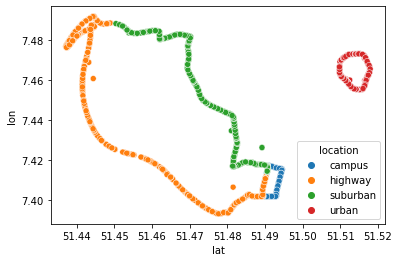

In [6]:
sns.scatterplot(data=dl, x='lat',y='lon',hue='location')

<AxesSubplot:xlabel='lat', ylabel='lon'>

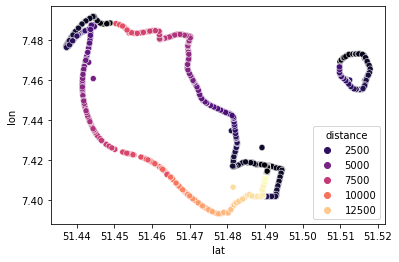

In [7]:
sns.scatterplot(data=dl, x='lat',y='lon',hue='distance',palette='magma')

<AxesSubplot:xlabel='lat', ylabel='lon'>

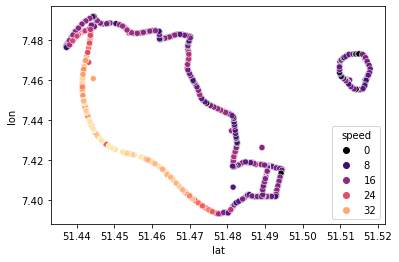

In [8]:
sns.scatterplot(data=dl, x='lat',y='lon',hue='speed',palette='magma')

<AxesSubplot:xlabel='lat', ylabel='lon'>

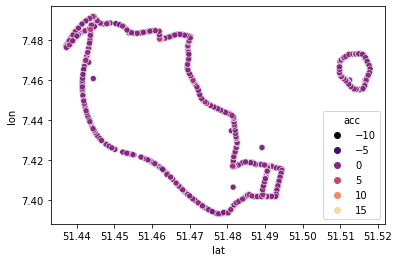

In [9]:
sns.scatterplot(data=dl, x='lat',y='lon',hue='acc',palette='magma')

<AxesSubplot:xlabel='lat', ylabel='lon'>

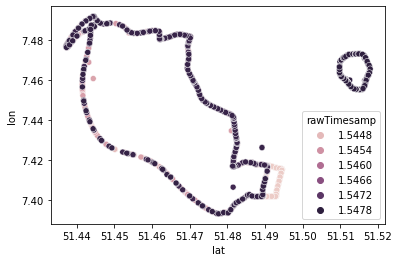

In [10]:
sns.scatterplot(data=dl, x='lat',y='lon',hue='rawTimesamp')

<AxesSubplot:xlabel='lat', ylabel='lon'>

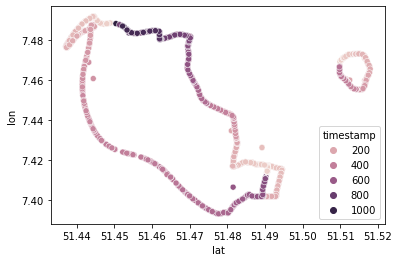

In [11]:
sns.scatterplot(data=dl, x='lat',y='lon',hue='timestamp')

<AxesSubplot:xlabel='lat', ylabel='lon'>

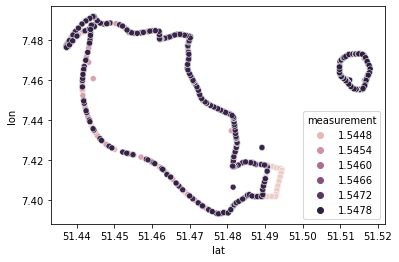

In [12]:
sns.scatterplot(data=dl, x='lat',y='lon',hue='measurement')

<AxesSubplot:xlabel='lat', ylabel='lon'>

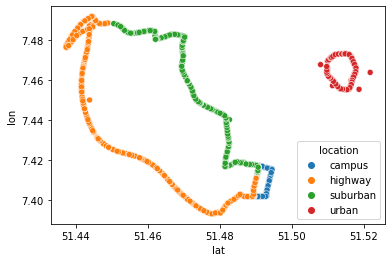

In [13]:
sns.scatterplot(data=ul, x='lat',y='lon',hue='location')

<AxesSubplot:xlabel='lat', ylabel='lon'>

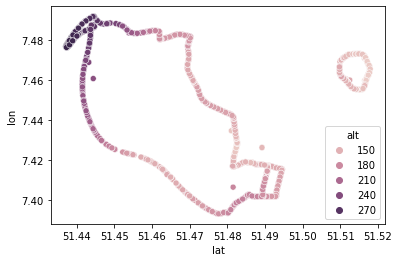

In [14]:
sns.scatterplot(data=dl, x='lat',y='lon',hue='alt')

<AxesSubplot:xlabel='lat', ylabel='lon'>

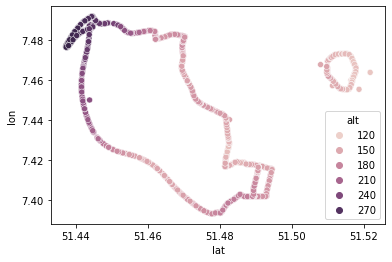

In [15]:
sns.scatterplot(data=ul, x='lat',y='lon',hue='alt')

<AxesSubplot:xlabel='lat', ylabel='lon'>

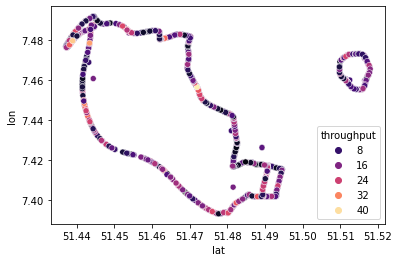

In [16]:
sns.scatterplot(data=dl, x='lat',y='lon',hue='throughput',palette='magma')

<AxesSubplot:xlabel='lat', ylabel='lon'>

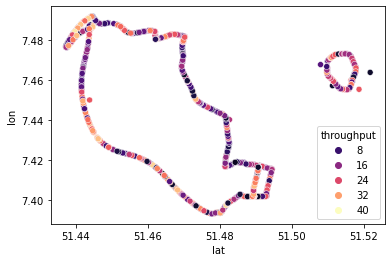

In [17]:
sns.scatterplot(data=ul, x='lat',y='lon',hue='throughput',palette='magma')

In [18]:
dl.isnull().sum().sum()
# no missing data in dl

0

In [19]:
ul.isnull().sum().sum()
# no missing data in ul

0

In [20]:
dl.info()
# dl has almost 2,200 data points, unlabeled index, 24 features, no missing data; dtypes: 13 ints, 10 floats, and 1 object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    2141 non-null   float64
 1   rawTimesamp  2141 non-null   int64  
 2   distance     2141 non-null   float64
 3   lat          2141 non-null   float64
 4   lon          2141 non-null   float64
 5   alt          2141 non-null   float64
 6   speed        2141 non-null   float64
 7   acc          2141 non-null   float64
 8   dir          2141 non-null   float64
 9   connected    2141 non-null   int64  
 10  rsrp         2141 non-null   int64  
 11  rsrq         2141 non-null   int64  
 12  sinr         2141 non-null   int64  
 13  cqi          2141 non-null   int64  
 14  ss           2141 non-null   int64  
 15  ta           2141 non-null   int64  
 16  ci           2141 non-null   int64  
 17  pci          2141 non-null   int64  
 18  id           2141 non-null   int64  
 19  payloa

In [21]:
ul.info()
# ul has almost 2,200 data points, unlabeled index, 25 features (versus 24), no missing data; dtypes: 13 ints, 11 floats and 1 object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    2142 non-null   float64
 1   rawTimesamp  2142 non-null   int64  
 2   distance     2142 non-null   float64
 3   lat          2142 non-null   float64
 4   lon          2142 non-null   float64
 5   alt          2142 non-null   float64
 6   speed        2142 non-null   float64
 7   acc          2142 non-null   float64
 8   dir          2142 non-null   float64
 9   connected    2142 non-null   int64  
 10  rsrp         2142 non-null   int64  
 11  rsrq         2142 non-null   int64  
 12  sinr         2142 non-null   int64  
 13  cqi          2142 non-null   int64  
 14  ss           2142 non-null   int64  
 15  ta           2142 non-null   int64  
 16  ci           2142 non-null   int64  
 17  pci          2142 non-null   int64  
 18  id           2142 non-null   int64  
 19  payloa

In [22]:
# timestamp: seems like an 'arbitrary' variable (drop this column?)
# rawTimesamp: unix timestamp; visit unixtimestamp.com/ to convert (correction of column name!)
# distance: distance from cell tower
# lat: latitude
# lon: longitude
# alt: altitude relative to NHN
# speed: [speed] = m/s
# acc: [acc] = m/s**2; contains negative values!
# dir: [dir] = grad; north === 0; dir: S -> [0,359.99]
# connect: LTE connection; here always one (drop this column!)

# signal performance indicator; visit cablefree.net/wirelesstechnology/4glte/rsrp-rsrq-measurement-lte/ for more detail
    # rsrp: performance indicator based on path loss; all values are negative (possibly irrelevant!)
    # rsrq: performance indicator; can contain negative values (possible irrelevant!)
    # sinr: performance indicator; can contain negative values (possible irrelevant!)
    # cqi: ? 
    # ss === Arbitrary Strength Unit (ASU); rsrp = ASU - 140 (redudant! drop this column!) 
    # ta: ? 
    # ci: ? 

# pci: physical cell ID; internal information (irrelevant!)
# id: vehicle ID
# payload: [payload] = MB
# throughput: [throughput] = mbits (key value!)
# rtt: [rtt] = ms; round trip time for the signal (vehicle -> tower -> vehicle)
# measuremt: experiment number 
# location: name of the location; location: S -> {'campus', 'highway', 'suburban', 'urban'}

# there is no column reflecting the frequency of the signal (see Variablenbeschreibung in moodle) (?)

# drop: timestamp, connect, ss, pci (?)
# rename: rawTimesamp -> timestamp
dl.columns

Index(['timestamp', 'rawTimesamp', 'distance', 'lat', 'lon', 'alt', 'speed',
       'acc', 'dir', 'connected', 'rsrp', 'rsrq', 'sinr', 'cqi', 'ss', 'ta',
       'ci', 'pci', 'id', 'payload', 'throughput', 'rtt', 'measurement',
       'location'],
      dtype='object')

In [23]:
# txPower: [txPower] = dBm; measurement of signal strength 

# drop: timestamp, connect, ss, pci (?)
# rename: rawTimesamp -> timestamp
ul.columns

Index(['timestamp', 'rawTimesamp', 'distance', 'lat', 'lon', 'alt', 'speed',
       'acc', 'dir', 'connected', 'rsrp', 'rsrq', 'sinr', 'cqi', 'ss', 'ta',
       'ci', 'pci', 'id', 'payload', 'throughput', 'rtt', 'txPower',
       'measurement', 'location'],
      dtype='object')

In [24]:
# Variablenbeschreibung

# - timestamp_ms ist ein Unix Timestamp, welcher die Umrechnung in eine konkrete Uhrzeit ermöglicht
# (siehe https://www.unixtimestamp.com/)
# - altitude_m die Höhe über Normalnull
# - veclocity ist in meter/s und acceleration in meter/s^2: Für die Beschleunigung sind negative Werte durch Bremsen 
# möglich (Änderung der Geschwindigkeit)
# - direction ist die Richtung in Grad, Norden entspricht 0 - isRegistered gibt an, ob das Gerät eine aktive 
# Verbindung zu einer LTE Zelle hat
# - rsrp ist ein Indikator für die Empfangsleistung und durch den Pfadverlust immer negativ – das heißt dann 
# einfach, dass nur sehr geringe Leistungsmengen beim Endgerät ankommen - rsrq und rssinr sind Verhältnisse von 
# Leistungen, auch hier sind negative werte möglich 
# (siehe auch https://www.cablefree.net/wirelesstechnology/4glte/rsrp-rsrq-measurement-lte/)
# - ss entspricht der Arbitrary Strength Unit (ASU) und ist redundant zum RSRP, da RSRP = ASU – 140
# - pci ist die Physical Cell Id, welche intern vom Endgerät verwendet wird, um Codierungsaufgaben zu machen 
# -> Sollte für euch nicht wichtig sein
# - payload entspricht der übertragenden Datenmenge in Megabyte
# - througput_mbits entspricht der Datenrate und somit der Zielgröße
# - connected 1 wenn eine Verbindung besteht 0 sonst
# - rtt_ms ist die Round Trip Time: Also die Signallaufzeit vom Sender zum Empfänger und wieder zurück
# - txPower_dBm entspricht der Sendeleistung des Endgerätes (somit auch nur im Uplink verfügbar, weil das 
# Endgerät im Downlink nur empfängt)
# - f_mhz entspricht der Trägerfrequenz der Basisstation, daher ist dies auch in wichtiges Feature, da die 
# Frequenz einen großen Einfluss auf die Funkausbreitungseigenschaften hat 
# - measurement ist die jeweilige Messfahrt

In [25]:
dl = dl.drop(['connected','timestamp'],axis=1)

In [26]:
ul = ul.drop(['connected','timestamp'],axis=1)

In [27]:
dl.head(3)

,rawTimesamp,distance,lat,lon,alt,speed,acc,dir,rsrp,rsrq,sinr,cqi,ss,ta,ci,pci,id,payload,throughput,rtt,measurement,location
0,1544432937,99.42,51.490553,7.413966,157.63,11.83,0.00,79.35,-85,-5,22,10,50,7,26385408,95,0,0.1,6.83763,41,1544432927,campus
1,1544432949,237.43,51.490715,7.416002,152.41,10.76,-0.52,89.45,-84,-6,11,13,52,4,29391105,167,1,2.0,9.71463,58,1544432927,campus
2,1544432959,325.26,51.490668,7.417176,154.64,6.19,-0.62,27.05,-82,-6,21,15,54,4,29391105,167,2,2.0,7.30594,57,1544432927,campus


In [28]:
ul.head(3)

,rawTimesamp,distance,lat,lon,alt,speed,acc,dir,rsrp,rsrq,sinr,cqi,ss,ta,ci,pci,id,payload,throughput,rtt,txPower,measurement,location
0,1544432938,113.75,51.490592,7.414306,156.39,12.21,0.5,77.59,-85,-5,22,10,50,7,26385408,95,0,4.0,24.5211,35,12.30470,1544432927,campus
1,1544432948,231.40,51.490717,7.415835,152.53,11.17,0.0,87.24,-84,-6,11,13,52,4,29391105,167,1,2.0,14.8561,51,10.01560,1544432927,campus
2,1544432959,323.73,51.490634,7.417138,154.23,6.44,0.0,48.55,-82,-6,21,15,54,4,29391105,167,2,4.0,16.2684,57,4.34375,1544432927,campus


In [29]:
dl.describe().transpose()
# some statistical values have no meaningful interpretation!

,count,mean,std,min,25%,50%,75%,max
rawTimesamp,2141.0,1.545881e+09,1.395781e+06,1.544433e+09,1.544680e+09,1.545135e+09,1.547616e+09,1.547803e+09
distance,2141.0,4.273933e+03,3.774430e+03,9.942000e+01,1.365830e+03,2.825780e+03,6.435790e+03,1.412402e+04
lat,2141.0,5.147864e+01,2.252776e-02,5.143714e+01,5.146308e+01,5.148165e+01,5.149067e+01,5.151791e+01
lon,2141.0,7.445595e+00,3.079581e-02,7.393019e+00,7.416637e+00,7.450149e+00,7.473018e+00,7.491755e+00
alt,2141.0,1.772354e+02,4.197569e+01,1.250600e+02,1.520000e+02,1.637000e+02,1.819200e+02,2.978200e+02
speed,2141.0,1.215470e+01,8.870322e+00,0.000000e+00,6.860000e+00,1.245000e+01,1.499000e+01,3.934000e+01
acc,2141.0,4.446520e-03,1.123975e+00,-1.105000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.726000e+01
dir,2141.0,1.648287e+02,9.317860e+01,3.000000e-02,9.230000e+01,1.502700e+02,2.506400e+02,3.599800e+02
rsrp,2141.0,-8.851985e+01,9.314856e+00,-1.130000e+02,-9.500000e+01,-8.900000e+01,-8.300000e+01,-5.600000e+01
rsrq,2141.0,-7.463802e+00,2.091197e+00,-1.900000e+01,-9.000000e+00,-7.000000e+00,-6.000000e+00,-4.000000e+00


In [30]:
ul.describe().transpose()
# some statistical values have no meaningful interpretation!

,count,mean,std,min,25%,50%,75%,max
rawTimesamp,2142.0,1.545889e+09,1.395255e+06,1.544433e+09,1.544680e+09,1.545135e+09,1.547616e+09,1.547803e+09
distance,2142.0,4.282102e+03,3.766634e+03,7.987000e+01,1.378810e+03,2.836010e+03,6.444035e+03,1.412534e+04
lat,2142.0,5.147852e+01,2.267911e-02,5.143718e+01,5.146261e+01,5.148165e+01,5.149066e+01,5.152182e+01
lon,2142.0,7.445505e+00,3.073957e-02,7.392997e+00,7.416640e+00,7.450149e+00,7.472981e+00,7.491727e+00
alt,2142.0,1.772895e+02,4.198303e+01,1.181700e+02,1.519175e+02,1.637700e+02,1.821850e+02,2.971600e+02
speed,2142.0,1.233604e+01,8.950635e+00,0.000000e+00,7.152500e+00,1.254000e+01,1.509500e+01,3.934000e+01
acc,2142.0,2.055556e-02,9.230749e-01,-6.030000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.304000e+01
dir,2142.0,1.656892e+02,9.309316e+01,4.000000e-02,9.134000e+01,1.513750e+02,2.511425e+02,3.599500e+02
rsrp,2142.0,-8.836134e+01,9.350568e+00,-1.130000e+02,-9.500000e+01,-8.900000e+01,-8.300000e+01,-5.600000e+01
rsrq,2142.0,-7.440710e+00,2.106458e+00,-1.900000e+01,-9.000000e+00,-7.000000e+00,-6.000000e+00,-4.000000e+00


In [31]:
dl['id'].unique()
# array of vehicle IDs?

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  30,  31,  32,  29,  33,  34,  35,  36,  37,  38,
        39,  41,  42,  43,  44,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  57,  58,  59,  60,  62,  64,  65,  66,  67,  68,  69,
        70,  71,  40,  45,  56,  61,  63,  72,  73,  74,  75,  76,  78,
        79,  80,  81,  82,  83,  84,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  77,  85,  99, 100, 101, 102, 103])

In [32]:
ul['id'].unique()
# array of vehicle IDs?

array([  0,   1,   2,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,
        15,  16,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,   3,   9,  17,  18,  34,  35,  36,  37,  40,  39,
        41,  42,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  57,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  38,  43,  73,  56,  58,  33,  72,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  84,  85,  87,  88,  90,  91,  93,  94,
        95,  96,  97,  98,  99,  83,  86,  89,  92, 100, 101, 102, 103])

In [33]:
dl['id'].unique() == ul['id'].unique()
# note that the vehicles are not identical 

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True])

In [34]:
dl['location'].unique()

array(['campus', 'highway', 'suburban', 'urban'], dtype=object)

In [35]:
dl['location'].unique() == ul['location'].unique()

array([ True,  True,  True,  True])

In [36]:
# len(dl['timestamp'].unique())
# we dropped this feature

In [37]:
len(dl['rawTimesamp'].unique())
# note that 'timestamp' and 'rawTimesamp' are differing amount of unique values

2138

In [38]:
len(dl)
# rawTimesamp cannot be index because it's not unique

2141

In [39]:
# len(ul['timestamp'].unique())
# we dropped this feature

In [40]:
len(ul['rawTimesamp'].unique())
# note that 'timestamp' and 'rawTimesamp' are differing amount of unique values

2140

In [41]:
len(ul)

2142

In [42]:
dl.equals(dl.drop_duplicates())
# no duplicates in download DataFrame

True

In [43]:
ul.equals(ul.drop_duplicates())
# no duplicates in upload DataFrame

True

In [44]:
dl.sort_values('rawTimesamp').head()

,rawTimesamp,distance,lat,lon,alt,speed,acc,dir,rsrp,rsrq,sinr,cqi,ss,ta,ci,pci,id,payload,throughput,rtt,measurement,location
0,1544432937,99.42,51.490553,7.413966,157.63,11.83,0.00,79.35,-85,-5,22,10,50,7,26385408,95,0,0.1,6.83763,41,1544432927,campus
1,1544432949,237.43,51.490715,7.416002,152.41,10.76,-0.52,89.45,-84,-6,11,13,52,4,29391105,167,1,2.0,9.71463,58,1544432927,campus
2,1544432959,325.26,51.490668,7.417176,154.64,6.19,-0.62,27.05,-82,-6,21,15,54,4,29391105,167,2,2.0,7.30594,57,1544432927,campus
3,1544432973,448.27,51.491839,7.416804,155.87,9.77,-0.98,342.45,-94,-9,9,9,45,4,29391105,167,3,3.0,3.94997,163,1544432927,campus
4,1544432982,540.48,51.492531,7.416222,154.41,12.33,0.01,336.68,-90,-6,16,9,45,4,29391105,167,4,5.0,8.54884,59,1544432927,campus


In [45]:
# pd.to_datetime(dl['rawTimesamp'],unit='s')
# pd.to_datetime(ul['rawTimesamp'],unit='s')
# change the timestamp format if neccessary

In [46]:
# apply filters to DataFrame? 

# sub-DataFrame per location with a filter or with isin() method
    # dl[dl['location']=='campus']
    # dl[dl['location']=='highway']
    # dl[dl['location']=='suburban']
    # dl[dl['location']=='urban']
    
    # ul[ul['location']=='campus']
    # ul[ul['location']=='highway']
    # ul[ul['location']=='suburban']
    # ul[ul['location']=='urban']

## Part 4

In [47]:
dl.corr()

,rawTimesamp,distance,lat,lon,alt,speed,acc,dir,rsrp,rsrq,sinr,cqi,ss,ta,ci,pci,id,payload,throughput,rtt,measurement
rawTimesamp,1.000000,-0.072429,0.316310,0.288450,-0.146200,-0.041262,-0.035921,-0.063609,-0.056240,0.046508,-0.052985,-0.078858,-0.056486,-0.002465,-0.147401,0.200240,-0.094833,0.043842,0.044219,-0.059295,1.000000
distance,-0.072429,1.000000,-0.244318,-0.243813,0.067715,0.329632,-0.003321,0.067191,0.146942,0.052987,-0.004863,0.047723,0.139942,0.119168,0.082589,-0.129290,0.783489,0.036347,0.132209,0.000996,-0.072565
lat,0.316310,-0.244318,1.000000,-0.325227,-0.795860,-0.452051,-0.065115,-0.132508,0.090325,0.063697,0.009719,-0.048432,0.110843,-0.092231,-0.346866,-0.076895,-0.256608,-0.005548,0.037768,-0.093787,0.316350
lon,0.288450,-0.243813,-0.325227,1.000000,0.409877,-0.053622,0.026486,-0.135801,-0.195357,-0.045005,-0.072089,-0.092208,-0.206719,-0.051666,0.083267,0.597640,0.136366,0.024384,-0.041582,0.002664,0.288421
alt,-0.146200,0.067715,-0.795860,0.409877,1.000000,0.296487,0.055800,0.071459,0.032911,0.132302,0.177938,0.166290,-0.013427,-0.134802,0.045965,0.019848,-0.015282,0.002225,0.020332,0.078667,-0.146195
speed,-0.041262,0.329632,-0.452051,-0.053622,0.296487,1.000000,0.074545,0.393086,0.052933,0.060926,-0.036012,0.069456,0.005707,0.265169,0.309203,-0.080954,0.090504,-0.004443,0.028435,0.050264,-0.041278
acc,-0.035921,-0.003321,-0.065115,0.026486,0.055800,0.074545,1.000000,0.032983,0.048784,0.016641,0.020564,-0.017115,0.029493,-0.015142,0.028241,0.038521,-0.002199,-0.016029,-0.020694,0.067178,-0.035920
dir,-0.063609,0.067191,-0.132508,-0.135801,0.071459,0.393086,0.032983,1.000000,-0.019740,-0.008256,-0.009961,0.013737,-0.045645,0.176845,0.262824,-0.067199,-0.078117,-0.007059,-0.045619,0.048768,-0.063594
rsrp,-0.056240,0.146942,0.090325,-0.195357,0.032911,0.052933,0.048784,-0.019740,1.000000,0.596054,0.657801,0.556257,0.958165,-0.294296,-0.136505,-0.106169,0.044189,-0.018696,0.309611,-0.073833,-0.056246
rsrq,0.046508,0.052987,0.063697,-0.045005,0.132302,0.060926,0.016641,-0.008256,0.596054,1.000000,0.675048,0.559617,0.450645,-0.274537,-0.059445,-0.011827,-0.063915,-0.024347,0.297185,-0.160365,0.046519


In [48]:
ul.corr()

,rawTimesamp,distance,lat,lon,alt,speed,acc,dir,rsrp,rsrq,sinr,cqi,ss,ta,ci,pci,id,payload,throughput,rtt,txPower,measurement
rawTimesamp,1.000000,-0.075157,0.317175,0.288499,-0.156773,-0.044742,-0.032168,-0.059578,-0.062623,0.047795,-0.062660,-0.079347,-0.061574,0.008418,-0.127935,0.200293,-0.098598,-0.011906,0.018246,-0.042838,0.077858,1.000000
distance,-0.075157,1.000000,-0.246007,-0.244973,0.066960,0.322627,-0.020394,0.063113,0.154681,0.063683,0.015600,0.047378,0.147037,0.104631,0.086078,-0.126801,0.784505,-0.003637,0.093922,0.005488,-0.145458,-0.075293
lat,0.317175,-0.246007,1.000000,-0.318605,-0.795056,-0.458020,-0.076073,-0.138082,0.084293,0.055484,-0.000732,-0.054862,0.105169,-0.096354,-0.370375,-0.090659,-0.250089,-0.036697,0.059516,-0.084135,0.030732,0.317213
lon,0.288499,-0.244973,-0.318605,1.000000,0.405465,-0.054661,0.030919,-0.114084,-0.198710,-0.040437,-0.077835,-0.091283,-0.210855,-0.039842,0.089816,0.597597,0.130409,0.004622,-0.053865,0.014156,0.158138,0.288471
alt,-0.156773,0.066960,-0.795056,0.405465,1.000000,0.294326,0.104308,0.067212,0.052089,0.147632,0.192313,0.177076,0.004861,-0.135756,0.065282,0.023770,-0.018365,0.019788,-0.009411,0.059062,-0.165039,-0.156768
speed,-0.044742,0.322627,-0.458020,-0.054661,0.294326,1.000000,0.044231,0.397196,0.044228,0.064759,-0.028671,0.067893,-0.002702,0.260665,0.335793,-0.074480,0.081129,-0.029272,-0.019170,0.058423,-0.052709,-0.044756
acc,-0.032168,-0.020394,-0.076073,0.030919,0.104308,0.044231,1.000000,0.017558,0.028771,0.036112,0.035709,0.019503,0.018937,-0.032659,-0.021572,-0.000357,-0.033679,-0.001753,0.025546,0.033462,-0.035285,-0.032162
dir,-0.059578,0.063113,-0.138082,-0.114084,0.067212,0.397196,0.017558,1.000000,-0.019662,-0.010291,-0.010624,0.011421,-0.045176,0.185690,0.280383,-0.049070,-0.081057,-0.018687,-0.055719,0.052331,0.011563,-0.059563
rsrp,-0.062623,0.154681,0.084293,-0.198710,0.052089,0.044228,0.028771,-0.019662,1.000000,0.597550,0.662152,0.559494,0.957307,-0.308676,-0.154642,-0.117743,0.045824,-0.013473,0.379373,-0.075380,-0.872275,-0.062630
rsrq,0.047795,0.063683,0.055484,-0.040437,0.147632,0.064759,0.036112,-0.010291,0.597550,1.000000,0.672267,0.557584,0.453905,-0.265985,-0.059773,-0.021183,-0.056219,-0.010885,0.333265,-0.165810,-0.495102,0.047804


In [49]:
dl['location'].value_counts()
# good categorical data to group by

suburban    858
highway     640
urban       363
campus      280
Name: location, dtype: int64

In [50]:
ul['location'].value_counts()
# good categorical data to group by

# is there more categorical data to group by? 

suburban    848
highway     650
urban       366
campus      278
Name: location, dtype: int64

In [51]:
dl.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2136    False
2137    False
2138    False
2139    False
2140    False
Length: 2141, dtype: bool

In [52]:
dl.nlargest(5,'throughput')

,rawTimesamp,distance,lat,lon,alt,speed,acc,dir,rsrp,rsrq,sinr,cqi,ss,ta,ci,pci,id,payload,throughput,rtt,measurement,location
569,1545111116,6575.87,51.443189,7.440798,225.68,34.92,0.00,287.42,-68,-5,31,15,63,18,33527552,376,34,9.0,43.0108,34,1545110765,highway
1737,1547647008,4644.25,51.471942,7.456441,161.80,12.67,0.00,113.70,-87,-5,25,12,48,7,29568768,415,52,10.0,41.7755,38,1547646477,suburban
1220,1544795439,4223.41,51.473138,7.450812,157.52,12.32,1.48,123.14,-83,-5,17,10,54,7,29568768,415,51,10.0,39.0434,35,1544794917,suburban
2021,1547802025,2419.58,51.512740,7.456824,143.03,14.90,0.00,129.58,-88,-10,4,8,52,1,26796290,25,24,10.0,38.5356,39,1547801772,urban
612,1545197312,1347.12,51.440304,7.485386,282.17,14.68,-0.37,233.53,-78,-6,19,12,61,1,27771908,270,12,8.0,38.3923,36,1545197180,highway


In [53]:
dl.nsmallest(5,'throughput')

,rawTimesamp,distance,lat,lon,alt,speed,acc,dir,rsrp,rsrq,sinr,cqi,ss,ta,ci,pci,id,payload,throughput,rtt,measurement,location
642,1545197683,10570.49,51.468872,7.403781,160.82,28.28,-1.10,313.05,-80,-5,-6,6,50,4,27770885,33,48,0.1,0.070194,83,1545197180,highway
639,1545197658,9746.63,51.464091,7.413126,152.47,34.49,0.00,310.40,-96,-9,0,8,43,47,27771140,49,43,1.0,0.219262,99,1545197180,highway
641,1545197683,10559.41,51.468698,7.404090,159.97,28.79,0.00,312.63,-97,-8,0,6,41,31,28368642,26,42,3.0,0.333060,97,1545197180,highway
510,1545025788,8483.03,51.454449,7.422880,160.98,35.76,0.00,343.96,-96,-10,-2,6,44,47,27771140,49,41,0.1,0.355241,357,1545025365,highway
643,1545197685,10640.45,51.469219,7.403170,162.97,28.61,0.19,313.15,-88,-19,-10,1,45,4,27770883,35,47,1.0,0.472283,38,1545197180,highway


In [54]:
ul.nlargest(5,'throughput')

,rawTimesamp,distance,lat,lon,alt,speed,acc,dir,rsrp,rsrq,sinr,cqi,ss,ta,ci,pci,id,payload,throughput,rtt,txPower,measurement,location
682,1545283773,3589.23,51.443682,7.483773,264.66,23.56,0.00,268.47,-79,-5,30,15,57,1,27771909,271,22,10.0,40.0601,35,3.125000,1545283541,highway
873,1547702877,1470.85,51.439657,7.484012,284.98,15.56,0.93,232.66,-72,-5,32,15,63,1,27771908,270,11,9.0,38.1356,39,-1.382810,1547702755,highway
915,1547703307,12465.05,51.481754,7.397372,184.83,15.70,-0.86,56.48,-85,-6,7,9,53,4,27771139,48,54,10.0,37.0542,37,13.125000,1547702755,highway
869,1547702837,854.07,51.443430,7.490552,275.55,16.20,0.72,216.73,-74,-5,32,15,63,6,27771907,272,7,9.0,36.4557,40,-0.304688,1547702755,highway
701,1545283963,9350.65,51.461367,7.417420,150.83,30.86,0.00,322.48,-84,-7,4,6,55,8,27770883,35,41,8.0,36.3430,37,14.078100,1545283541,highway


In [55]:
ul.nsmallest(5,'throughput')

,rawTimesamp,distance,lat,lon,alt,speed,acc,dir,rsrp,rsrq,sinr,cqi,ss,ta,ci,pci,id,payload,throughput,rtt,txPower,measurement,location
281,1544593376,719.82,51.444633,7.491625,278.60,0.00,0.00,127.23,-108,-9,-2,8,32,7,27771907,272,5,0.1,0.277201,358,21.5625,1544593312,highway
312,1544593725,8485.02,51.454994,7.422637,159.56,35.48,-0.35,343.36,-91,-10,2,7,43,44,28365063,274,40,0.1,0.420170,488,19.4531,1544593312,highway
804,1547615940,739.44,51.444386,7.491662,271.31,5.64,0.00,215.72,-107,-10,-2,4,37,6,27771907,272,8,0.5,0.432994,736,21.7813,1547615839,highway
377,1544679848,8453.38,51.454167,7.422987,160.98,27.69,-0.18,343.81,-93,-10,5,6,42,45,28365063,274,40,0.1,0.454031,433,18.9531,1544679435,highway
636,1545197657,9734.56,51.464091,7.413126,152.47,34.49,0.37,310.40,-87,-14,-6,1,54,6,33527554,375,46,0.1,0.534761,5322,10.3281,1545197180,highway


## Part 5

In [56]:
# df.groupby(['model_year','cylinders']).describe().transpose()

In [57]:
dl['rawTimesamp']
# convert the rawTimesamp from an integer into a datetime object

0       1544432937
1       1544432949
2       1544432959
3       1544432973
4       1544432982
           ...    
2136    1547803330
2137    1547803343
2138    1547803350
2139    1547803361
2140    1547803369
Name: rawTimesamp, Length: 2141, dtype: int64

In [58]:
# sns.pairplot(data=dl, kind='kde')
# plt.savefig('plot1.png')

# Machine Learning Models: Supervised Learning - Predict an Outcome

Starting situation: We start with a collection of organized data based on history. We have **historical labeled** data on previous rides / tours, i.e. a set of features and a label (throughput). 

Task: Create a data product that: If we take a new ride / make a new tour with a know Latitude, Longitude, ...; predict what will be the throughput. 

Data product: 
- Input: ride / tour / experiment features
- Output: predicted throughput 

Principle: we're using historical, labeled data to predict a future outcome or result

For process see GitHub Repo. 

# Linear Regression

In [59]:
dl.head()

,rawTimesamp,distance,lat,lon,alt,speed,acc,dir,rsrp,rsrq,sinr,cqi,ss,ta,ci,pci,id,payload,throughput,rtt,measurement,location
0,1544432937,99.42,51.490553,7.413966,157.63,11.83,0.00,79.35,-85,-5,22,10,50,7,26385408,95,0,0.1,6.83763,41,1544432927,campus
1,1544432949,237.43,51.490715,7.416002,152.41,10.76,-0.52,89.45,-84,-6,11,13,52,4,29391105,167,1,2.0,9.71463,58,1544432927,campus
2,1544432959,325.26,51.490668,7.417176,154.64,6.19,-0.62,27.05,-82,-6,21,15,54,4,29391105,167,2,2.0,7.30594,57,1544432927,campus
3,1544432973,448.27,51.491839,7.416804,155.87,9.77,-0.98,342.45,-94,-9,9,9,45,4,29391105,167,3,3.0,3.94997,163,1544432927,campus
4,1544432982,540.48,51.492531,7.416222,154.41,12.33,0.01,336.68,-90,-6,16,9,45,4,29391105,167,4,5.0,8.54884,59,1544432927,campus


In [61]:
X = dl.drop('throughput',axis=1)

In [ ]:
# consider the original data frame when evaluating the performance of the regression with an error evaluation metric. 
# consider the range for the values (and compare to the mean absolute error)

In [68]:
dl['throughput'].mean()

13.125105272396077

<AxesSubplot:xlabel='throughput', ylabel='Count'>

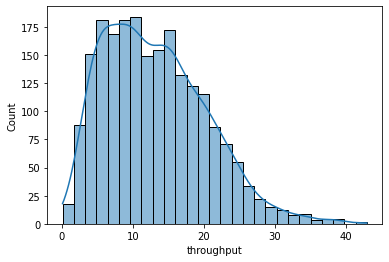

In [65]:
sns.histplot(data=dl,x='throughput', kde=True)
# the distribution is not normal but it rathers resembles a Poisson distribution

In [69]:
ul['throughput'].mean()

18.164607070494863

<AxesSubplot:xlabel='throughput', ylabel='Count'>

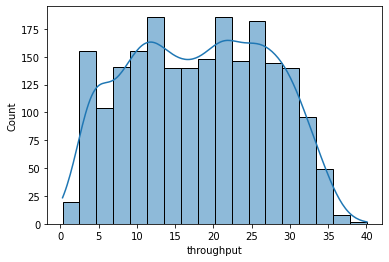

In [67]:
sns.histplot(data=ul,x='throughput', kde=True)
# the distribution resembles a unitform distribution

# Cleaning, Analysis and Feature Engineering

# Train Linear Regression Model